In [16]:
import numpy as np
import matplotlib.pyplot as plt
import time
import timeit

plt.rcParams['text.usetex'] = True

In [17]:
# Generates random upper triangular matrix
def generate_U(n):
    A = np.zeros((n,n))
    for i in range(n):
        t = np.random.random((n-i,))
        A += np.diag(t,i)
    return A

In [18]:
def solve_upper_triangular_system(U,b):
    x = np.zeros_like(b)
    n = U.shape[0]
    for i in range(n-1,-1,-1):
        x[i] = (b[i] - np.dot(U[i,i+1:],x[i+1:]))/(U[i,i])
    return x

In [19]:
# def solve_upper_triangular_system(U,b):
#     x = np.zeros_like(b)
#     n = U.shape[0]
#     for i in range(n-1,-1,-1):
#         sum = 0.
#         for j in range(i+1,n):
#             sum+=U[i,j]*x[j]
#         x[i] = (b[i] - sum)/(U[i,i])
#     return x

In [20]:
n = 10
U = generate_U(n)
b = np.random.random(n)
x = solve_upper_triangular_system(U,b)
print("The error in solution of the linear system is ", np.linalg.norm(U@x-b,ord=2))

The error in solution of the linear system is  4.509747244882934e-15


In [21]:
computation_time=[]
timer =  timeit.Timer()

for i in range(4):   
    n = 10**i
    compute_time_for_n = []
    start = time.perf_counter()
    for j in range(np.int64(np.ceil(10**(4-i)))):
        U = generate_U(n)
        b = np.random.random(n)
        x = solve_upper_triangular_system(U,b)
        #print("The time to compute the solution is", stop-start)
    stop = time.perf_counter() 
    compute_time_for_n.append((stop-start)/np.int64(np.ceil(10**(3-i))))
    # print("The average time to compute the solution is", np.average(compute_time_for_n))
    print("The total time to compute the solution is", np.sum(compute_time_for_n))
    computation_time.append(np.average(compute_time_for_n))

 

The total time to compute the solution is 0.0002793861999962246
The total time to compute the solution is 0.0014756040000065695
The total time to compute the solution is 0.018503059999784455
The total time to compute the solution is 30.819230900000548


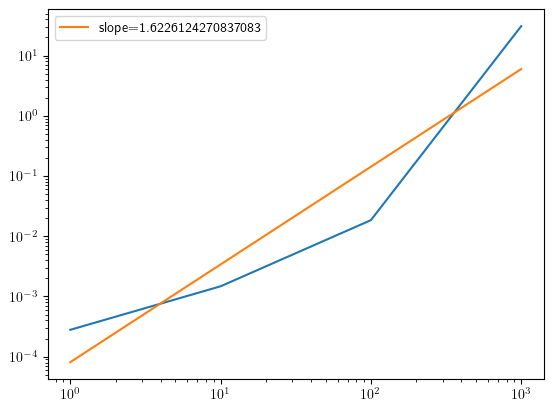

In [22]:
n = np.arange(0.,4.,1.)
plt.loglog(10**n,computation_time,base=10)
a,b = np.polyfit(n,np.log10(computation_time),1)
plt.loglog(10**(n),10**(a*n+b),base=10,label=f'slope={a}')
plt.legend()
plt.show()

In [23]:
def generate_tridiagonal_matrix(n):
    l = np.random.random((n-1,))
    u = np.random.random((n-1,))
    d = np.random.random((n,))
    return np.diag(l,-1)+np.diag(d)+np.diag(u,1)


In [24]:
def solve_tridiagonal_system(T,b):
    x = np.zeros_like(b)
    n = T.shape[0]
    T = np.copy(T)
    b = np.copy(b)
    for i in range(1,n):
        T[i,i] = T[i,i] - T[i-1,i]*(T[i,i-1]/T[i-1,i-1])
        b[i] = b[i] -  b[i-1] *(T[i,i-1]/T[i-1,i-1])
    x[n-1] = b[n-1]  /T[n-1,n-1]
    for i in range(n-2,-1,-1):
        x[i] = (b[i] - x[i+1]*T[i,i+1])/T[i,i]
    return x

In [25]:
n = 100
l = np.random.random((n-1,))
u = np.random.random((n-1,))
T = np.diag(l,-1) + np.diag(1. + np.abs(np.concatenate([np.array([0]),l],axis=0)) + 
                            np.abs(np.concatenate([u,np.array([0])],axis=0))) + np.diag(u,1)
b = np.random.random((n,))
x = solve_tridiagonal_system(T,b)
x_true = np.linalg.solve(T,b)
print("The error in the solution is :", np.linalg.norm(T@x-b,ord = 2))

The error in the solution is : 5.523289809442722e-16
